<a href="https://colab.research.google.com/github/NandiniMehta0603/Tensorflow/blob/main/Computer_Vision_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Convolutional neural netwroks and computer vision*

Computer vision is a practice pf writing algorithms which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car in the front.

##get the data
The images we are workign with are from the Food101 dataset (101 different classes of food)
However we have modified it to use only 2 classes using the image data modification

**Note** we start with a smaller dataset so that we can experiment quickly ans figure what works (or better yet what doesn't work) before sclaing up

In [1]:
import zipfile

# ie get this file download here

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-04-14 09:23:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.127.128, 142.251.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  32.7MB/s    in 3.2s    

2023-04-14 09:23:35 (32.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



##Inspect the data (become one with it)
Very crucial step at the beginning of any ML project is becoming one with the data.

And for a computer vision project..this usually means visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os

#walk through the pizza_steak directory and list number of files 
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
  

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
#The extra file in pizza_streak directory is ".DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Apr  7 10:13 .
drwxr-xr-x 1 root root 4096 Apr  7 10:13 ..
drwxr-xr-x 4 root root 4096 Apr  7 10:13 test
drwxr-xr-x 4 root root 4096 Apr  7 10:13 train


In [ ]:
#Another way to find how many images are in a file
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualise the images, lets first get the class names programmatically

In [ ]:
#Get the classnames programmatically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")])) #created a list of class_names from the subdirectory
# class_names=class_names[1:]-->to remove DS Store if you have 
print(class_names)

['pizza' 'steak']


In [ ]:
#Lets visualise the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class): #in string format
  #set up the target directory
  target_folder=target_dir+target_class

  #get a random image path
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)

  #read in the image and plot it using matplotlib
  img=mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: { img.shape}")#show the shape of the image

  return img


['3102271.jpg']
Image shape: (512, 512, 3)


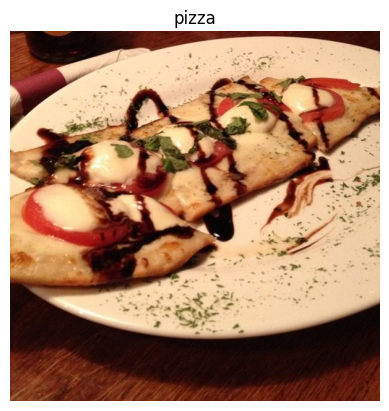

In [ ]:
#view a random image from the training dataset
img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="pizza")


In [ ]:
# img #represented as a tensor

import tensorflow as tf
tf.constant(img) #so here we are converting our image as tensor to work as a feasible input

#the images we have imported and plotted are actually giant arrays/tensors of different pixel values 


<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 81,  38,  29],
        [ 77,  34,  25],
        [ 80,  37,  28],
        ...,
        [ 51,  12,   5],
        [ 51,  10,   4],
        [ 51,  10,   4]],

       [[ 86,  39,  29],
        [ 84,  37,  27],
        [ 88,  41,  31],
        ...,
        [ 53,  14,   7],
        [ 51,  10,   4],
        [ 50,   9,   3]],

       [[ 64,  12,   0],
        [ 60,   8,   0],
        [ 62,  10,   0],
        ...,
        [ 53,  14,   7],
        [ 50,  11,   4],
        [ 49,   8,   2]],

       ...,

       [[151,  85,  51],
        [165, 101,  66],
        [160,  95,  63],
        ...,
        [114,  39,  18],
        [110,  35,  14],
        [107,  32,  11]],

       [[167, 103,  68],
        [148,  84,  49],
        [129,  66,  33],
        ...,
        [110,  35,  14],
        [111,  36,  15],
        [112,  37,  16]],

       [[142,  78,  43],
        [126,  63,  28],
        [119,  56,  23],
        ...,
        [108,  33,  1

In [ ]:
#view the image shape
img.shape #returns the width,height,color channels

(512, 512, 3)

In [ ]:
#get all the pixel values between 0 and 1-->scaling/normalization
img/255

array([[[0.31764706, 0.14901961, 0.11372549],
        [0.30196078, 0.13333333, 0.09803922],
        [0.31372549, 0.14509804, 0.10980392],
        ...,
        [0.2       , 0.04705882, 0.01960784],
        [0.2       , 0.03921569, 0.01568627],
        [0.2       , 0.03921569, 0.01568627]],

       [[0.3372549 , 0.15294118, 0.11372549],
        [0.32941176, 0.14509804, 0.10588235],
        [0.34509804, 0.16078431, 0.12156863],
        ...,
        [0.20784314, 0.05490196, 0.02745098],
        [0.2       , 0.03921569, 0.01568627],
        [0.19607843, 0.03529412, 0.01176471]],

       [[0.25098039, 0.04705882, 0.        ],
        [0.23529412, 0.03137255, 0.        ],
        [0.24313725, 0.03921569, 0.        ],
        ...,
        [0.20784314, 0.05490196, 0.02745098],
        [0.19607843, 0.04313725, 0.01568627],
        [0.19215686, 0.03137255, 0.00784314]],

       ...,

       [[0.59215686, 0.33333333, 0.2       ],
        [0.64705882, 0.39607843, 0.25882353],
        [0.62745098, 0

in order to process all the images simultaneously-->tensorflow provides a good method

**Note** Many ML models including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with iamges is to scale (also referred to as normalise) their pixel values by dividing the image arrays by 255 (since 255 is the maxi pixel value)

##An end to end example
let's build a convolutional neural network to find patterns in the iamges, more specifically we need a way to:
* Load the images
* Preprocess the images
* BUild a CNN to find patterns in the images
* Compile the CNN
* Fit the CNN to our training data

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# #set the seed
# tf.random.set_seed(42)

# #preprocess data (get all of the pixel values between 0 and 1, also called as scaling/normalizing)
# train_datagen=ImageDataGenerator(rescale=1./255) 
# #generates batches of tensor image data with real time data augmentation
# valid_datagen=ImageDataGenerator(rescale=1./255)

# #setup paths to our data directories
# train_dir="/content/pizza_steak/train"
# test_dir="/content/pizza_steak/test"

# #import data from the directories and turn it into batches-->preprocess it
# train_data=train_datagen.flow_from_directory(directory=train_dir,
#                                              batch_size=32,
#                                              target_size=(224,224), #in our case, we want all our images to be reshaped to this shape-->common shape-->stores optimal amount of info about an image
#                                              class_mode="binary",
#                                              seed=42 #for reproducibility
#                                              )

# valid_data=valid_datagen.flow_from_directory(directory=test_dir,
#                                              batch_size=32,
#                                              target_size=(224,224),
#                                              class_mode="binary",
#                                              seed=42)

# #build a CNN model 
# model_1=tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters=10,
#                            kernel_size=3,
#                            activation="relu",
#                            input_shape=(224,224,3)),
#     tf.keras.layers.Conv2D(10,3,activation="relu"),
#     tf.keras.layers.MaxPool2D(pool_size=2,
#                               padding="valid"),
#     tf.keras.layers.Conv2D(10,3,activation="relu"),
#     tf.keras.layers.Conv2D(10,3,activation="relu"),
#     tf.keras.layers.MaxPool2D(2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(1,activation="sigmoid")
# ])

# #compile the CNN model
# model_1.compile(loss="binary_crossentropy",
#                optimizer=tf.keras.optimizers.Adam(),
#                metrics=["accuracy"])

# #fit the model
# history_1=model_1.fit(train_data,
#                       epochs=5,
#                       steps_per_epoch=len(train_data),
#                       validation_data=valid_data,
#                       validation_steps=len(valid_data))

this ETA is taking so long bec we are not using a hardware acceleration-->change it to GPU-->it runs much faster

In [ ]:
# len(train_data) #1500/32 -->the reason we put all of our images into batches is so that all could be stored in the memory

##An end to end example

convolutional neural network to find patterns in the images
* Load the images
*preprocess the images
*build a CNN to find patterns in the images
* compile the CNN
* fit the CNN to the training data

Usually first epoch takes 50% of the total time to load because here the image has to loaded into memory,processed and then displayed--> so rest of the epochs are faster-->change to GPU

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#preprocess the data (get all the pixel values between 0 and 1, also called as scaled/normalised tensors)
train_datagen=ImageDataGenerator(rescale=1./255) #generates batches of tensor image data with real time data augmentation--> the data will be looped over in batches
valid_datagen=ImageDataGenerator(rescale=1./255)

#set up paths for the data directories
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

#import data from the directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224), #we want our image to be loaded in this shape
                                             class_mode="binary", #tells that we are loading our data in binary-->2 classes
                                             seed=42 #for reproducibility
                                             )

valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

#build a cnn model
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    # tf.keras.layers.Activations(tf.nn.relu), -->if you want to explicitly mention relu layer
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
    
])

#compile the cnn model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data), #ie 47 passes-->1 for each batch of 32 size ie 32 images per batch-->so as to store in memory
                      validation_data=valid_data,
                      validation_steps=len(valid_data))
                                

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 241ms/step - loss: 0.6094 - accuracy: 0.6787 - val_loss: 0.5034 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 11s 241ms/step - loss: 0.4673 - accuracy: 0.7893 - val_loss: 0.3578 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 10s 218ms/step - loss: 0.3721 - accuracy: 0.8440 - val_loss: 0.3127 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 10s 214ms/step - loss: 0.3315 - accuracy: 0.8700 - val_loss: 0.2898 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 10s 214ms/step - loss: 0.2537 - accuracy: 0.9100 - val_loss: 0.3102 - val_accuracy: 0.8580


**Note** if the above cell is taking longer than 10 seconds per epoch, make sure to use a GPU by going to runtime->change runtime type-> hardware accelerator-> gpu (we may have to run some cells again and reload the data)

In [ ]:
#get the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

##Using the same model as before

Replicating the model that was made previously to see if it works with the image data



In [ ]:
train_data

In [ ]:
#set random seed
tf.random.set_seed(42)

#create the model 
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)), #cause we want to tell the model that we have reshaped data to these dimensions
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 209ms/step - loss: 0.6965 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 16s 349ms/step - loss: 0.6932 - accuracy: 0.4853 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6932 - accuracy: 0.4827 - val_loss: 0.6931 - val_accuracy: 0.5000


Through observation-->the model is just guessing on the data-->the model is not working on the image data

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20X more parameters than the CNN model, model_2 performs terribly

In [ ]:
#set the random seed
tf.random.set_seed(42)

#create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)), #otherwise there will be shape mismatch for the next layer
    tf.keras.layers.Dense(100,activation="relu"), #increasing the hidden units
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 225ms/step - loss: 2.6538 - accuracy: 0.6433 - val_loss: 1.0111 - val_accuracy: 0.7160
Epoch 2/5
47/47 [==============================] - 14s 296ms/step - loss: 0.9667 - accuracy: 0.7027 - val_loss: 0.5059 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.9652 - accuracy: 0.7113 - val_loss: 0.5715 - val_accuracy: 0.7240
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.6003 - accuracy: 0.7500 - val_loss: 0.4336 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 10s 207ms/step - loss: 0.5641 - accuracy: 0.7707 - val_loss: 0.8644 - val_accuracy: 0.6400


Here the accuracy has increased from 50% to 70%-->it better than guessing

In [ ]:
#Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


15 million parameters-->500 times more params than the cnn model...deep learning models are very versatile-->generally with CV we use CNNs

**Note** trainable params are the patterns a model can learn from the data. Intuitively the more is better, but in this case the difference here is two different styles of models we are using. Where a series of dense layers has a number of different learnable params connected to each other and hence a higher number of possible learnable patterns, a **convulational neural network** seeks a sort and learn the most **important patterns in an image**. So even though these are less learnable params in the CNN, these are often more helpful in deciphering between different features in an image

##Binary Classification

1.become one with the data(visualise)
2. preprocess the data (prepared it for the model,main step here was scaling/normalising)
3. created a model (start with the baseline)
4. fit the model
6. adjust different params ad improve the model( try to beat the baselines)
7. repeat until satisfies(experiment)

###Become with the data

In [2]:
#Lets visualise the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class): #in string format
  #set up the target directory
  target_folder=target_dir+target_class

  #get a random image path
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)

  #read in the image and plot it using matplotlib
  img=mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: { img.shape}")#show the shape of the image

  return img


['2090504.jpg']
Image shape: (512, 384, 3)
['1065078.jpg']
Image shape: (512, 384, 3)


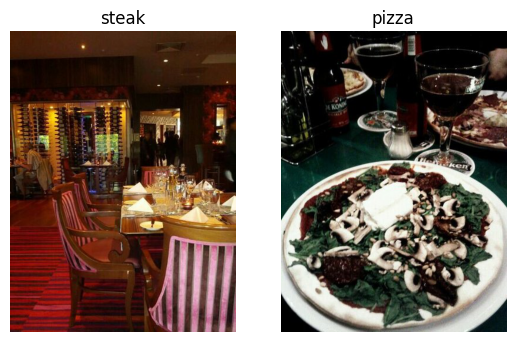

In [3]:
#visualise the data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

plt.figure()
plt.subplot(1,2,1)
# steak_img=view_random_image("pizza_steak/train/","steak")
steak_img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

###Preprocess the data-->prepare the data for the model

In [4]:
#define the directory dataset paths
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"


Next steps is to turn our data into **batches**
A batch is a small subset of data that model looks at while training rather than looking at all the images at one time

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of the preprocessor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well

32 is preferable usually 

In [5]:
!nvidia-smi

Fri Apr 14 09:24:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
#create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)


Generates batches of tensor image data with real-time data augmentation



As rightly pointed out by you the rescale=1./255 will convert the pixels in range [0,255] to range [0,1]. This process is also called Normalizing the input. Scaling every images to the same range [0,1] will make images contributes more evenly to the total loss.

In [7]:
#load in the image data from directories and turn them into batches
train_data=train_datagen.flow_from_directory(directory=train_dir, #target director of iamges
                                             target_size=(224,224), #target size of images (height,width)
                                             class_mode="binary", #categorical/binary data-->type of data
                                             batch_size=32) #size of minibatches to load our data into

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode="binary",
                                           batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [8]:
#get a sample of a train data batch
images, labels=train_data.next() #get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [9]:
#how many batches are there
len(train_data)

47

In [10]:
1500/32

46.875

In [11]:
#get the first 2 images
#first 2 images of the first batch
images[:2], images[0].shape
#we can see that the pixel values have been scaled-->normalised to (0,1)
#reshaped to 224,224,3

(array([[[[0.5254902 , 0.5764706 , 0.35686275],
          [0.52156866, 0.5568628 , 0.38823533],
          [0.50980395, 0.5568628 , 0.29803923],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.52156866, 0.5529412 , 0.40000004],
          [0.5294118 , 0.5647059 , 0.35686275],
          [0.5294118 , 0.5686275 , 0.33333334],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.52156866, 0.5529412 , 0.32941177],
          [0.5411765 , 0.54901963, 0.39607847],
          [0.5372549 , 0.54901963, 0.37254903],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.00392157, 0.02352941],
          [0.     

In [12]:
images[7].shape

(224, 224, 3)

In [13]:
#view the first match of the labels
labels #maybe 1 for pizza and 0 for steak

array([1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.],
      dtype=float32)

###Create the model-->CNN model

(start with the baseline model)--> A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline

In [14]:
#Make the creating of the model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential



**more about the conv 2d layer**
1. Conv2d layer takes images as input and helps produce tensor of outputs
2. Kernel: for image processing--> used for blurring, sharpening, embossing, edge detection-->image preprocessing
3. filters: no of filters that conv2d layer learns from--> also determines that conv2d layer learns from (no of filters should always be in power of 2)
4. maxpool layer: to reduce spatial dimensions of the output volume
5. kernel_size: an integer-->with height and width of conv2d window
6. strides: steps of convolution along with height and width of input volume--> Its default value is always set to (1, 1) which means that the given Conv2D filter is applied to the current location of the input volume and the given filter takes a 1-pixel step to the right and again the filter is applied to the input volume and it is performed until we reach the far right border of the volume in which we are moving our filter.
7. padding: takes **valid **-->i/p volume is not 0-->spatial dimensions are allowed to reduce or **same**-->preserve spatial dimensions of the volume such as o/p volume matches the i/p volume
8. activation: adds non linearity to the model at each step--> if not applied-->no impact on the performance of the model


**Note** in deep learning, there are almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (eg look at which current model is performing best in the field of the problem)

In [15]:
#create the model (this will be the baseline, a layer convolutional neural network)
model_4=Sequential([
    Conv2D(filters=10, #no of sliding windows going across an input (higher=more complex model)
           kernel_size=3,  #the size of the sliding window across an input
           strides=1, #the size of the step the sliding window takes across an input
           padding="valid", #if "same", the output shape is the same as input shape, if "valid", the o/p shape gets compressed
           activation="relu", 
           input_shape=(224,224,3)), #input layer (specify input shape)

    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid") #output layer (working with binary classification so only 1 output neuron)
])

1. **filter**: decides how many filters should pass over a tensor (sliding windows over an image) -->higher values lead to more complex models (just like a dense layer with more no of neurons)

2. **Kernel size**: (filter size) determines shape of the filter (sliding window) over the output --> 3(3*3),5,7 (lower values learn small features, higher values learn larger features) means lower values may learn the toppings of the pizza and the higher values may learn the edges of the pizza

3. **padding**: pads the tensor with zeros (if "same") to preserve input shape(keeps the amt of info in the input). Or leaves in the target tensor as is ("valid"-->if you want to keep compressing the info), lowering output shape.

4. **strides**: The number of steps a filter takes across an image at a time (stride=1-default, a filter moves across an image 1 pixel at a time)



64,64,3-> here 3 means 3 color channels,
kernel is a kind of sliding window that move over the image and then outputs some kind of value of(3*3 size ie as per kernel size)--> kernel covers all the pixels of the image one by one, for each filter(ie 10-->according to user input, a single image gets split into multiple filters over which the model learns) there will be a diff kernel. https://poloclub.github.io/cnn-explainer/

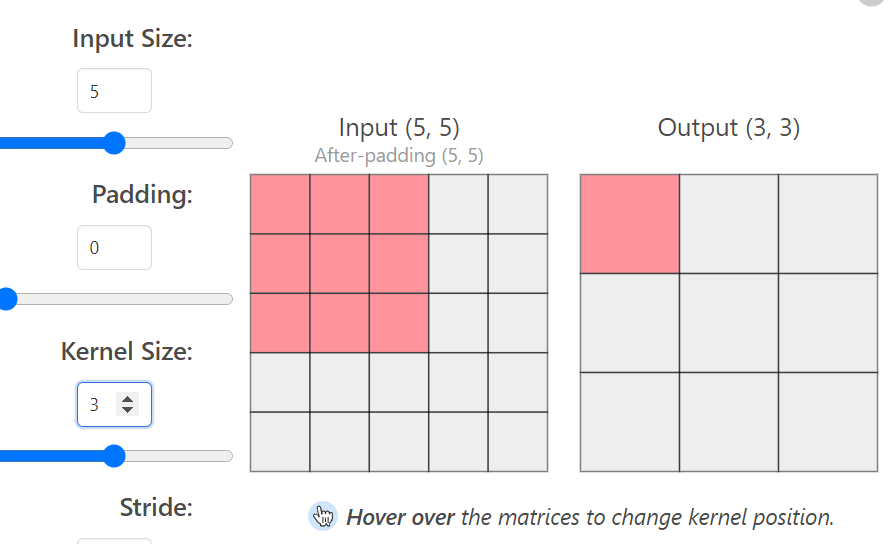
each kernel box associates an output value


padding is usually necessary when the kernel extends beyond the activation map. It conserves the data at the border of the activation maps which leads to better performance--> also preserves the input spatial size.
padding of 1 means adding a blank border outside the image--< ie we can use the info closer to the edge more efficiently
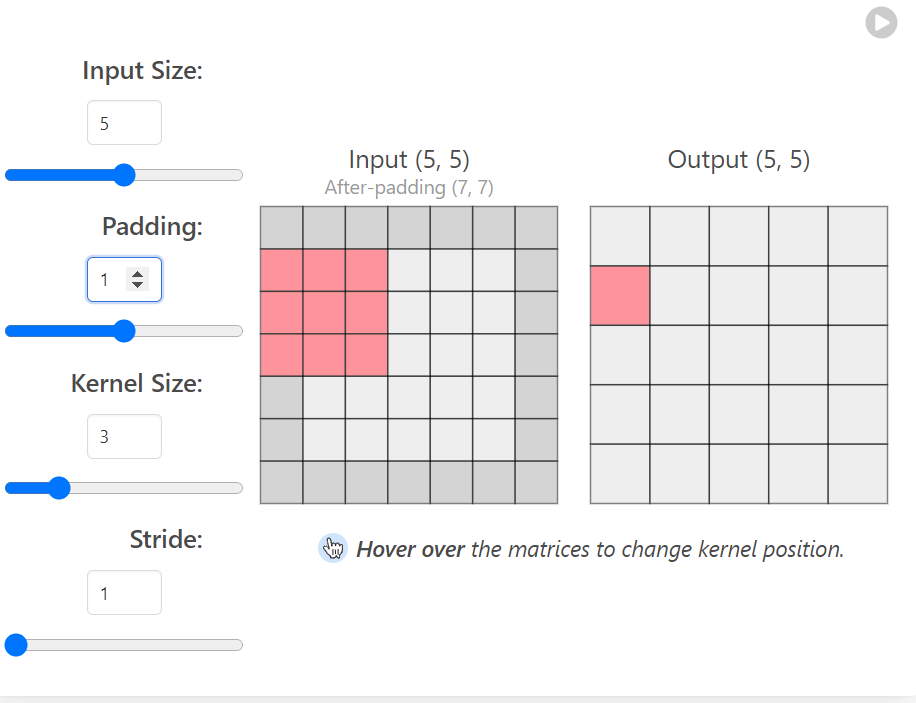


by increasing the stride, we are compressing the info on the smallest space of the output--> ie if stride=2, kernel has to move 2 steps and store that in the ouput
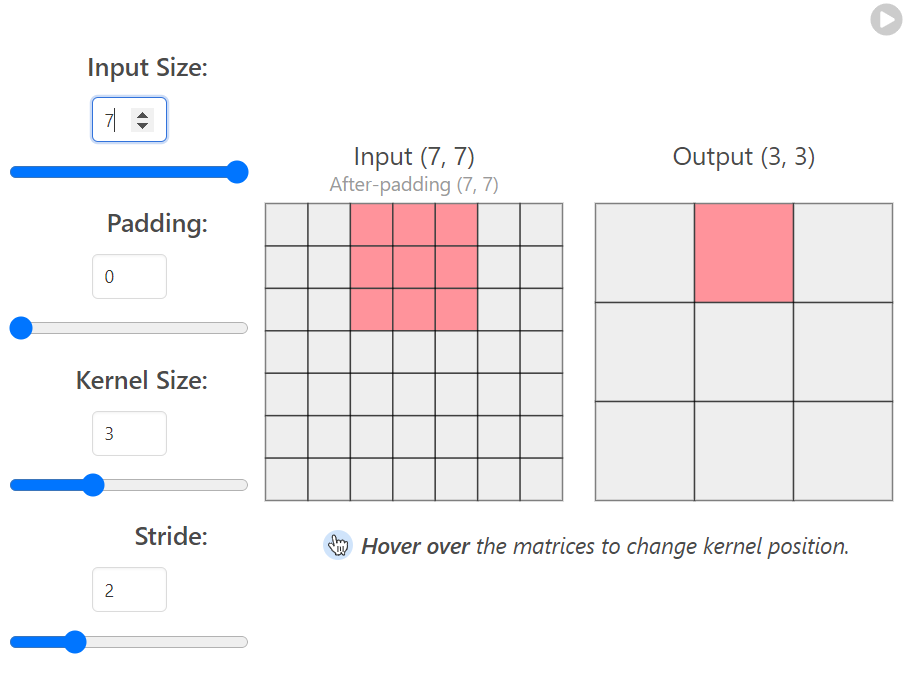

if the info is not too dense, keep the stride at lower numbers

**By the end we get an input that is compressed to an input feature**

In [16]:
#compile the model
model_4.compile(loss="binary_crossentropy",
                # optimizer=tf.keras.optimizers.Adam(),
                optimizer=Adam(),
                metrics=["accuracy"])


In [17]:
#get the summary of the model
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


###Fit the model

In [18]:
#Check the length of the training data and test data generators
len(train_data), len(test_data) #batches

(47, 16)

In [19]:
#fit the model
history_4=model_4.fit(train_data, #this is the combination of labels and data
                      epochs=5,
                      steps_per_epoch=len(train_data), #total no of steps (batches of samples) before declaring the epoch finished and starting the next epoch
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 250ms/step - loss: 1.0003 - accuracy: 0.5873 - val_loss: 0.5427 - val_accuracy: 0.7040
Epoch 2/5
47/47 [==============================] - 12s 265ms/step - loss: 0.4972 - accuracy: 0.7673 - val_loss: 0.4543 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 10s 221ms/step - loss: 0.3792 - accuracy: 0.8360 - val_loss: 0.4541 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 10s 223ms/step - loss: 0.2013 - accuracy: 0.9280 - val_loss: 0.4901 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 10s 221ms/step - loss: 0.1103 - accuracy: 0.9740 - val_loss: 0.6843 - val_accuracy: 0.7740


This tells that the model is actually learning something and not just guessing-->evaluate it

###Evaluate the model

<Axes: >

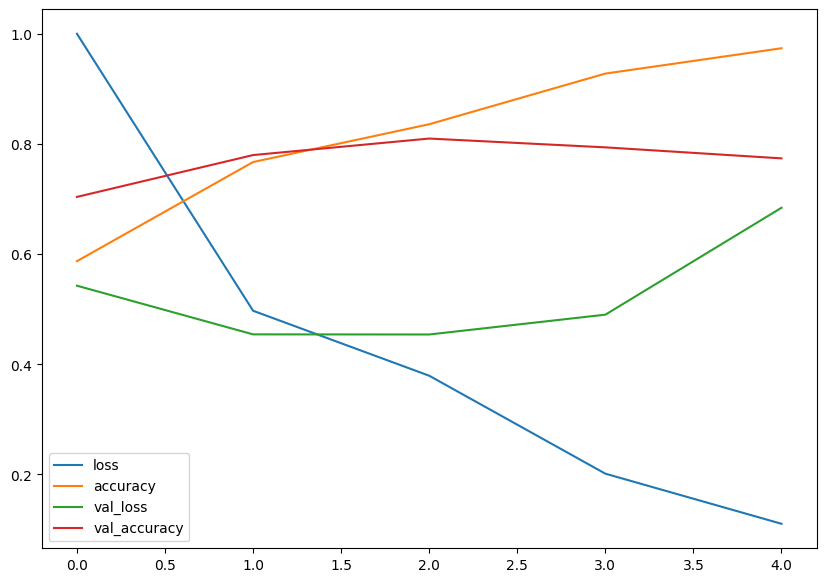

In [20]:
#plot the training curves

import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [21]:
#plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """

  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"])) #how many epochs

  #plot the loss
  plt.plot(epochs,loss,label="training loss")
  plt.plot(epochs,val_loss,label="val loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot the accuracy
  plt.plot(epochs,accuracy,label="training accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

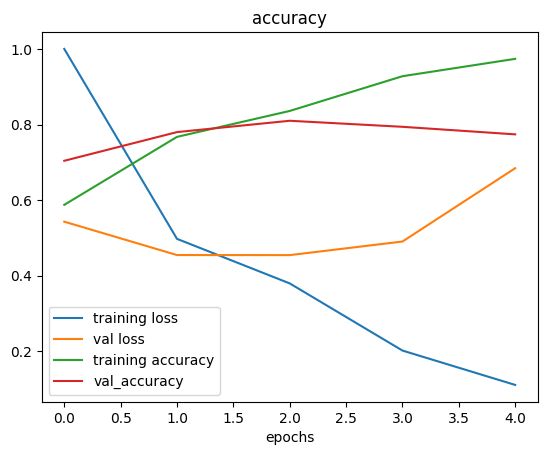

In [22]:
#check the loss and accuracy of model 4
plot_loss_curves(history_4)

**Note** when a model's validation loss starts to increase or stays constant, its likely that the model is overfitting on the training data. This means it is learning the patterns in  the training **too well** and thus the model's ability to generalise the unseen data will be diminished. 

**Generalisation** means the ability for a machine learning model to perform well on data it hasn't seen before.

###Adjust the model parameters


Fitting the machine learning model comes with 3 steps:
0. create a baseline 
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting 

Ways to induce oerfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of the flattened layer

Reduce overfitting 
* add data augmentation
* add regularization layers (such as MaxPool2D)
* Add more data...

In [23]:
#create the model (this is going to be our new baseline model)
model_5=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

Maxpooling operation for 2D spatial data


Downsamples the input representation by taking the maxi value over the window defined by pool size for each dimension along the features axis. The window is shifted by strides in each dimension. **ie** we are condesing the input to a small output. Out of all the features, we take the most important parts of those features

example:
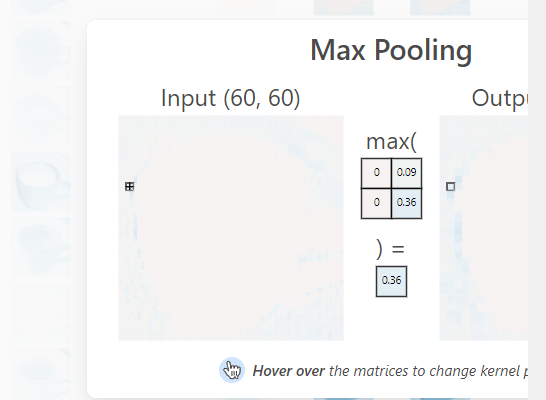
in each box, it is taking the max value of each feature

In [24]:
#compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [25]:
#fit the model
history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 16s 270ms/step - loss: 0.6045 - accuracy: 0.6880 - val_loss: 0.4090 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4322 - accuracy: 0.8120 - val_loss: 0.4081 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.4256 - accuracy: 0.8033 - val_loss: 0.3384 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 16s 349ms/step - loss: 0.3833 - accuracy: 0.8360 - val_loss: 0.3291 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 12s 254ms/step - loss: 0.3607 - accuracy: 0.8467 - val_loss: 0.3118 - val_accuracy: 0.8700


In [26]:
#get the summary of the model with maxpooling layer
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

The max pooling parameters are half the size: 111
conv layer takes -2 params, and then maxpooling again takes half of the params

**Note** in model_4, there were 50 times more params than in model_5 but still the model_5 outperforms model_4

In [27]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


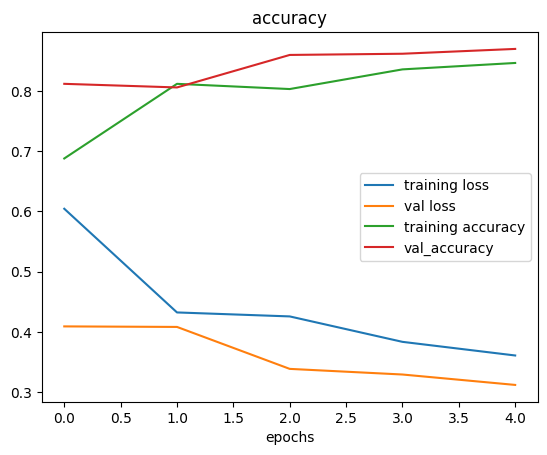

In [28]:
#plot the loss curves
plot_loss_curves(history_5)

The directions of the curves are atleast getting along and if we keep on training the model with suitable params, we will get a best result model soon. Aligning the lines is imp because it signifies that the model is generalising well on training as well as on testing.

* the max pooling layer has halved the features and removed them by taking the max-->condensed 
* thus even though params are reduced but all of them are of great value

**Note** reducing overfitting is also known as regularization

###Opening the bag of tricks and finding data augmentation

In [29]:
#create imagedataGenerator training instance with data augmentation

#generates batces of tensor image data with real time data augmentation
#the data will be looped over batches 
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.3,
                                           horizontal_flip=True)

#create image generator without data augmentation
train_datagen=ImageDataGenerator(rescale=1/255.)

#create image data generator without data augmentation for the test dataset
test_datagen=ImageDataGenerator(rescale=1/255.)

**data augmenation**

It is a process of altering the training data, leading it to have more diversity and in turn allowing the models to learn more generalizable patterns. Altering might mean adjusting the rotation of the image, flipping it, cropping it or something similar.

**Improving the model**
1. more data: gives the model a chance to learn patterns between smaples (eg if the model is performing poorly on images of pizza, show it more images of pizza)

2. data augmentation: increase the diversity of the training dataset without collecting more data (take the photos of pizza and randomly rotate them 30 degrees), Increased diversity forces a model to learn more generalisation patterns.

3. Better data: no all data samples are created equally. Removing poor samples from or adding better samples to the dataset can improve the model's performance.

4. use transfer learning: take the model's pre learned patterns from one problem and tweak them to suit your own problems. for eg: take a model trained on pictures of cars to recognise pictures of trucks.